In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import plotly.express as px
from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/work/Include/')
import stat_process

In [ ]:
import importlib
importlib.reload(stat_process)

<module 'stat_process' from '/work/Include/stat_process.py'>

In [ ]:
# import and process data
df = pd.read_csv("/work/Results/Motive/Processed/motive_processed_july4.csv")
df.replace({"AI with caring motives":"Caring Motive",
            "AI with no motives":"No Motive",
            "AI with manipulative motives":"Manipulative Motive"}, inplace=True)

name_dict = {"Caring motives":"Caring Motive",
            "No motive":"No Motive",
            "Manipulative/malicious motives":"Manipulative Motive"}
            
stat_process.addProcessedCol(df, "From your own experience, what do you think the motive of the agent was?  Selected Choice", 
                "Perceived Motives", name_dict)

conditions_list = ["No Motive", "Manipulative Motive", "Caring Motive"]

df

,Start Date,End Date,Response Type,IP Address,Progress,Duration in seconds,Finished,Recorded Date,Response ID,Recipient Last Name,...,"Are you of Hispanic, Latino/a/x, or of Spanish origin? one or more categories may be selected Prefer to selfdescribe Text",assigned_category,assigned_group,session_id,convo_conversation,convo_group_id,convo_AI_turns,convo_human_turns,convo_total_turns,Perceived Motives
0,2022-06-17 19:06:58,2022-06-17 19:30:44,IP Address,*******,100,1426,True,2022-06-17 19:30:44,R_3HzsyHEWtJTUPi1,*******,...,NaN,NaN,Caring Motive,2022-06-18T01:08:23.936Z,">AI: I am Melu, a mental health companion. I ...",Caring Motive,37,36,73,Caring Motive
1,2022-06-17 19:37:24,2022-06-17 19:55:51,IP Address,*******,100,1106,True,2022-06-17 19:55:51,R_qJhnyVIDIs4CJYR,*******,...,NaN,NaN,No Motive,2022-06-18T01:40:50.676Z,">AI: I am Melu, a mental health companion. I ...",No Motive,27,26,53,Caring Motive
2,2022-06-17 19:55:10,2022-06-17 20:10:32,IP Address,*******,100,921,True,2022-06-17 20:10:32,R_2fBsUpW2LcXQ7SP,*******,...,NaN,NaN,Manipulative Motive,2022-06-18T01:56:45.963Z,">AI: I am Melu, a mental health companion. I ...",Manipulative Motive,20,19,39,Caring Motive
3,2022-06-17 19:55:10,2022-06-17 20:10:43,IP Address,*******,100,933,True,2022-06-17 20:10:43,R_2V9McykguniYrKX,*******,...,NaN,NaN,Manipulative Motive,2022-06-18T01:57:09.013Z,">AI: I am Melu, a mental health companion. I ...",Manipulative Motive,11,10,21,Caring Motive
4,2022-06-17 20:05:37,2022-06-17 20:20:11,IP Address,*******,100,873,True,2022-06-17 20:20:11,R_2dtnelhjtaccq7c,*******,...,NaN,NaN,Caring Motive,2022-06-18T02:06:51.036Z,">AI: I am Melu, a mental health companion. I ...",Caring Motive,17,16,33,Caring Motive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2022-06-24 10:56:11,2022-06-24 11:11:18,IP Address,*******,100,907,True,2022-06-24 11:11:19,R_3exJwREuGMBJO1I,*******,...,NaN,NaN,No Motive,2022-06-24T16:58:28.952Z,">AI: I am Melu, a mental health companion. I ...",No Motive,12,11,23,No Motive
156,2022-06-24 10:30:27,2022-06-24 11:12:35,IP Address,*******,100,2528,True,2022-06-24 11:12:36,R_3NRgOI3IRZLpd16,*******,...,NaN,NaN,No Motive,2022-06-24T16:33:51.256Z,">AI: I am Melu, a mental health companion. I ...",No Motive,35,34,69,No Motive
157,2022-06-24 10:36:02,2022-06-24 11:17:17,IP Address,*******,100,2475,True,2022-06-24 11:17:18,R_2XoinwbLDyODujA,*******,...,NaN,NaN,Caring Motive,2022-06-24T16:39:30.124Z,">AI: I am Melu, a mental health companion. I ...",Caring Motive,72,71,143,Caring Motive
158,2022-06-24 10:45:31,2022-06-24 11:19:36,IP Address,*******,100,2044,True,2022-06-24 11:19:36,R_2WGOcIB0JMp3Fe4,*******,...,NaN,NaN,Caring Motive,2022-06-24T16:55:12.300Z,">AI: I am Melu, a mental health companion. I ...",Caring Motive,4,3,7,Caring Motive


In [ ]:
ivar = "assigned_group"
dvar = "Agent: The motive statement influenced your perception"
my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dvar = "Agent: The motive statement influenced your perception"
datalist = stat_process.getDataList(df, "assigned_group", dvar, conditions_list)

long_table = stat_process.getLongTable(datalist)

tukey = pairwise_tukeyhsd(endog=long_table['Data'].to_numpy(), groups=long_table['Condition'], alpha=0.05)
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tukey_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Caring Motive,Manipulative Motive,-0.401,0.4764,-1.2160,0.4140,False
1,Caring Motive,No Motive,-0.963,0.0148,-1.7703,-0.1556,True
2,Manipulative Motive,No Motive,-0.562,0.2355,-1.3770,0.2531,False


In [ ]:
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
      Caring Motive Manipulative Motive   -0.401 0.4764  -1.216   0.414  False
      Caring Motive           No Motive   -0.963 0.0148 -1.7703 -0.1556   True
Manipulative Motive           No Motive   -0.562 0.2355  -1.377  0.2531  False
------------------------------------------------------------------------------


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Manipulative Motive vs. Caring Motive: Custom statistical test, P_val:4.764e-01
No Motive vs. Manipulative Motive: Custom statistical test, P_val:2.355e-01
No Motive vs. Caring Motive: Custom statistical test, P_val:1.480e-02


(<AxesSubplot:xlabel='assigned_group', ylabel='Agent: The motive statement influenced your perception'>,
  <statannotations.Annotation.Annotation at 0x7f540623b090>])

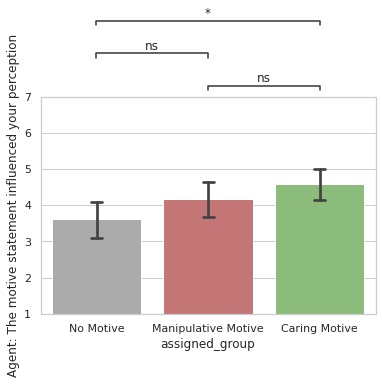

In [ ]:
pairs = [(i[1]["group1"], i[1]["group2"]) for i in tukey_df.iterrows()]
p_values = [i[1]["p-adj"] for i in tukey_df.iterrows()]

plt.tight_layout()

sns.set(style="whitegrid")

my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}
ax = sns.barplot(data=df, x=ivar, y=dvar, order=conditions_list, palette=my_pal, capsize=.1)
plt.ylim(1, 7)
annot = Annotator(
    ax, pairs, data=df, x=ivar, y=dvar, order=conditions_list
)
annot.configure(text_format="star", loc="outside")
annot.set_pvalues_and_annotate(p_values)

In [ ]:
stat_process.Kruskal_Wallis_Test(datalist)

alpha: 0.05
KruskalResult(statistic=8.343702568319806, pvalue=0.01542368006257743)
Significant Result for Kruskal Wallis. Therefore we compute the DUNN post-hoc test.
          1         2         3
1  1.000000  0.245325  0.012522
2  0.245325  1.000000  0.817821
3  0.012522  0.817821  1.000000
Pairwise Dunn P-Values:
(1, 3): No Motive-Caring Motive : pvalue = 0.012521646113215958 : SIGNIFICANT (*)


True

In [ ]:
import scikit_posthocs as sp
import itertools

flag = True
alpha = 5e-2 #0.05
print(f"alpha: {alpha}")

args = [sr[1] for sr in datalist]  # this returns a list of series
grps = [sr[0] for sr in datalist]  # list of experimental groups

# for key in data_dict:
#   print(key)

# RUN KW Test
# Inputs are *individual series, one for each category
kw_result = stats.kruskal(*args)
statistic = kw_result[0]
pvalue = kw_result[1]
print(kw_result)

flag = False
if pvalue < alpha:  # KW returns significant result
    print("Significant Result for Kruskal Wallis. Therefore we compute the DUNN post-hoc test.")
    dunn = sp.posthoc_dunn(args, p_adjust='bonferroni')

dunn

alpha: 0.05
KruskalResult(statistic=8.343702568319806, pvalue=0.01542368006257743)
Significant Result for Kruskal Wallis. Therefore we compute the DUNN post-hoc test.


,1,2,3
1,1.000000,0.245325,0.012522
2,0.245325,1.000000,0.817821
3,0.012522,0.817821,1.000000


In [ ]:
dunn2 = dunn.set_axis(conditions_list, axis=1)
dunn2.set_axis(conditions_list, axis=0, inplace=True)
dunn2

,No Motive,Manipulative Motive,Caring Motive
No Motive,1.000000,0.245325,0.012522
Manipulative Motive,0.245325,1.000000,0.817821
Caring Motive,0.012522,0.817821,1.000000


In [ ]:
remove = np.tril(np.ones(dunn2.shape), k=0).astype("bool")
dunn2[remove] = np.nan

molt_df = dunn2.melt(ignore_index=False).reset_index().dropna()
molt_df.set_axis(["group1", "group2", "p-adj"], axis=1, inplace=True)
molt_df

,group1,group2,p-adj
3,No Motive,Manipulative Motive,0.245325
6,No Motive,Caring Motive,0.012522
7,Manipulative Motive,Caring Motive,0.817821


In [ ]:
def plotStats(data, ivar, dvar, conditions_list, stats, pal, ylims=None, test="tukey"):
    '''
    Ref: https://blog.4dcu.be/programming/2021/12/30/Posthoc-Statannotations.html 

    Args: 
        data: pandas dataframe of the data
        ivar: string, column name of the independent variable
        dvar: string, column name of the dependent variable
        conditions_list: list of strings, names of groups for independent variable
        stats: returned results from tukey or dunn
        pal: dictionary, palettes for conditions
        ylims: tuple of y-axis limits, if any
        test: string, must be tukey or dunn

    '''

    # format post-hoc tests into a non-reduntant list of comparisons with p value
    if test == "tukey":
        stat_df = pd.DataFrame(data=stats._results_table.data[1:], columns=stats._results_table.data[0])
    elif test == "dunn":
        dunn = stat.set_axis(conditions_list, axis=1)
        dunn.set_axis(conditions_list, axis=0, inplace=True)
        
        remove = np.tril(np.ones(dunn.shape), k=0).astype("bool")
        dunn[remove] = np.nan

        stat_df = dunn.melt(ignore_index=False).reset_index().dropna()
        stat_df.set_axis(["group1", "group2", "p-adj"], axis=1, inplace=True)
    else: 
        print("Error: test must be tukey or dunn")
        return
    
    pairs = [(i[1]["group1"], i[1]["group2"]) for i in stat_df.iterrows()]
    p_values = [i[1]["p-adj"] for i in stat_df.iterrows()]

    plt.tight_layout()

    sns.set(style="whitegrid")

    ax = sns.barplot(data=data, x=ivar, y=dvar, order=conditions_list, palette=pal, capsize=.1)
    if ylims is not None:
        plt.ylim(ylims[0], ylims[1])
    annot = Annotator(
        ax, pairs, data=data, x=ivar, y=dvar, order=conditions_list
    )
    annot.configure(text_format="star", loc="outside")
    annot.set_pvalues_and_annotate(p_values)

[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=0.5297765644419269, pvalue=0.5897851840590602)
The populations have equal variances.
[StatTest] Assumption of Equal Variances was met. Run basic ANOVA.
---------------------------------------------
Performing ANOVA
F_onewayResult(statistic=4.018923658971343, pvalue=0.01985244581062491)
ANOVA found signifance. At least one of the means of the groups is different.
[StatTest] Basic ANOVA found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
      Caring Motive M

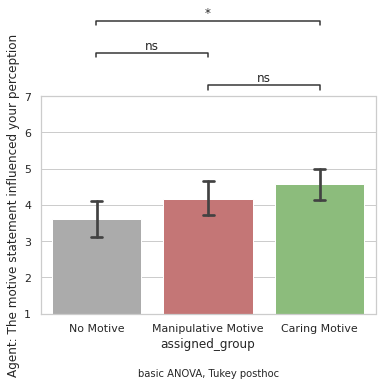

In [ ]:
import importlib
importlib.reload(stat_process)
stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

In [ ]:
import itertools
cmbs = itertools.combinations(conditions_list, 2)

In [ ]:
for comb in cmbs:
    print(comb)

('No Motive', 'Manipulative Motive')
('No Motive', 'Caring Motive')
('Manipulative Motive', 'Caring Motive')


In [ ]:
cmbs = itertools.combinations(conditions_list, 2)
g1 = []
g2 = []
pv = []
for comb in cmbs:
    g1.append(comb[0])
    print(comb[0])
    g2.append(comb[1])
    pv.append(1)


No Motive
No Motive
Manipulative Motive


In [ ]:
d = {"group1":g1, "group2":g2, "p-adj":pv}
stat_df = pd.DataFrame(data=d)
stat_df

,group1,group2,p-adj
0,No Motive,Manipulative Motive,1
1,No Motive,Caring Motive,1
2,Manipulative Motive,Caring Motive,1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4cb10f81-1a63-431a-81dd-4a1a5d69504e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>